# 분석 파이프라인

- 준비된 데이터를 특정한 절차에 따라 분석을 진행해야 하는데 이를 '파이프라인'이라고 함
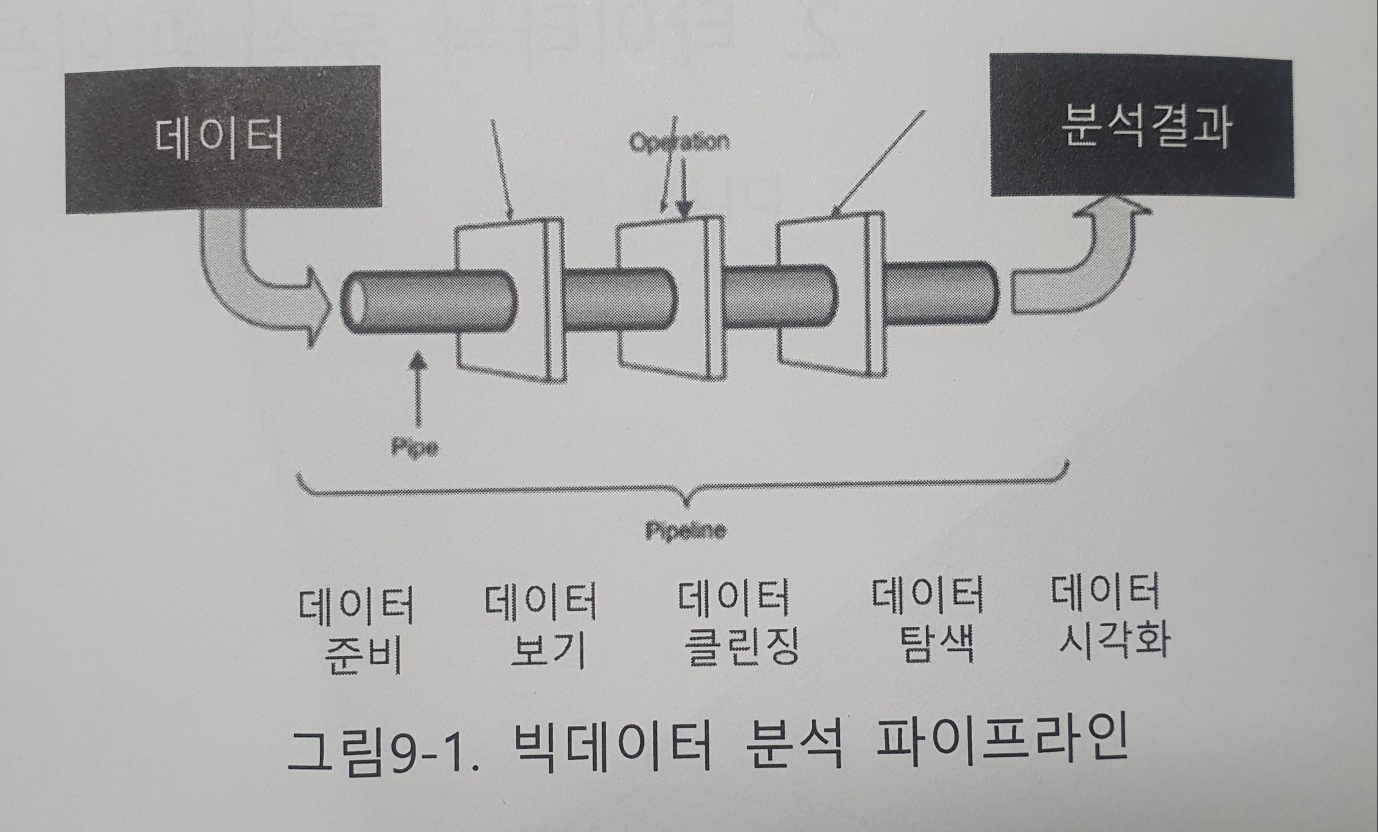

## 빅데이터 분석 파이프라인

1. 데이터 준비 : 
>- 데이터 소스, 데이터 백업
<br><br>
1. 데이터 보기 : 
>- 데이터프레임의 기본 정보 출력: 데이터프레임임명.info()
>- 데이터프레임의 통계 요약 정보 출력: 데이터프레임명.describe()
>- 데이터유형 확인: df.dtypes
>- 행데이터
>- 열변수
>- 변수유형
>- 데이터 조작: 데이터 개수 확인, 정렬
>- 데이터 병합과 연결(옵션)
<br><br>
1. 데이터 클린징 :
>- 결측값
>- 이상값
>- 중복값
<br><br>
1. 데이터 탐색 :
>- 단일변수 데이터분석
>- 데이터재구조화
>- 데이터그룹분석
<br><br>
1. 데이터 시각화
>- 범주형 단일변수
>- 연속형 단일변수
>- 범주형/범주형
>- 연속형/연속형
>- 범주형/연속형

## 데이터 분석 시작 전 몇가지 질문
>- 데이터보기로 전반적인 데이터 형태를 보았나요?
>- 데이터가 일부인가 전부인가요?
>- 데이터의 크기는 얼마나 되나요?
>- 데이터 식별자가 있는가요? 있으면 무엇인가요?
>- 데이터를 합병해야 한다면 같은 종류의 데이터인가요?
<br><br>
>- 최대값, 최소값은 무엇인가요?
>- 중간값, 평균은 얼마인가요?
>- 이상값이 있나요?
>- 결측값이 있다면 무엇이고 왜 누락되었을까요?

# 타이타닉 분석 파이프라인

- 타이타닉 데이터 변수<br><br>
|변수|설명|변수설명|구분|
|------|---|---|--|
|PassengerId|승객번호|||
|Survived|생존여부|0 = No, 1 = Yes||
|Pclass|객실등급|1 = 등급, 2 = 등급, 3 = 등급|범주|
|Name|승객이름||범주|
|Sex|성별|male, female||
|Age|나이|||
|SibSp|함께 탑승한 현재와 배우자의 수|형제수 + 배우자수||
|Parch|함께 탑승한 부모, 아이의 수|부모수 + 자녀수||
|Ticket|티멧 번호|||
|Fare|탑승 요금|||
|Cabin|객실 번호|공백도 많고 정확한 기준을 알 수 없습니다||
|Embarked|탑승 항구|C=Cherbourg, Q=Queenstown, S=Southampton|범주|

## 데이터 준비
- 빅데이터 분석과 머신러닝 파이프라인 준비과정에서 가장 중요한 첫 단계는 원본 데이터 보존입니다.
<br><br>
- 손상된 데이터는 다시 복구할 수 없기 때문에 반드시 복사본을 만드는 과정부터 시작해야 합니다.

In [1]:
# 관련 라이브러리 불러오기
import pandas as pd  #판다스
import matplotlib as mpl  # 맷플롭립
import matplotlib.pylab as plt  #맷플롭립
import seaborn as sns  #시본
import numpy as np  #넘파이

#타이타닉 데이터를 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/data/titanic.csv'

df = pd.read_csv(file_path)  #read_csv()함수로 데이터프레임 변환
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# 데이터 백업하기
titanic_cpy_backup = df.copy()
#to_csv 메소드를 사용하여 내장 데이터프레임을 csv파일로 저장
# C:\data폴더에 저장
df.to_csv('C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/data/titanic_csv_backup.csv')

# 저장 파일 확인
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/data/titanic_csv_backup.csv'
titanic_csv_backup = pd.read_csv(file_path)
titanic_csv_backup

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 데이터 보기

In [3]:
df.info()  #데이터프레임의 기본 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()  #데이터프레임의 기초 통계 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes  # 데이터유형 확인

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.loc[0]  # 데이터 행 인덱스 확인

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [7]:
df.head()  # 상위 데이터 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()  # 하위 데이터 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df.index  # 데이터프레임 인덱스 보기

RangeIndex(start=0, stop=891, step=1)

In [10]:
df.values  #행, 열 구조 보기

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [11]:
df.sort_values(by=['Fare'], axis=0)  # 요금 기준 오름차순 정렬

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [12]:
df.sort_values(by=['Fare'], axis=0, ascending=False)  # 요금 기준 내림차순 정렬

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [13]:
df.sort_index(axis=1)  # 열 이름을 (알파벳 순서로) 정렬하기 : axis=1 Age부터 출력

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369


In [14]:
df.sum(axis=1)  # 단순열 합계

C:\Users\BurgerC\AppData\Local\Temp\ipykernel_21028\1595565387.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)  # 단순열 합계


0       34.2500
1      114.2833
2       40.9250
3       95.1000
4       51.0500
         ...   
886    929.0000
887    939.0000
888    918.4500
889    948.0000
890    933.7500
Length: 891, dtype: float64

## 데이터 클린징

- 결측치 시각화 과정을 통해 결측치를 처리하려면 missingno 패키지를 설치합니다.
- pip install missingno  # missingno 라이브러리 설치
<br><br>
>- 객실번호(Cabin) : 결측치가 너무 많기 때문에 제거
>- 탑승항구(Embarked) : 2개의 결측치가 있으므로 어느 값으로 채워도 문제 없어 보이며 가장 빈도가 높은 값으로 대체
>- 나이(Age) : 결측치가 많고 나이에 따라 생존 여부와 상관 있을 것으로 예상되어 데이터를 중앙값으로 대체

In [15]:
df.count()  # 데이터 갯수 확인

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [16]:
df.isnull().sum()  # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

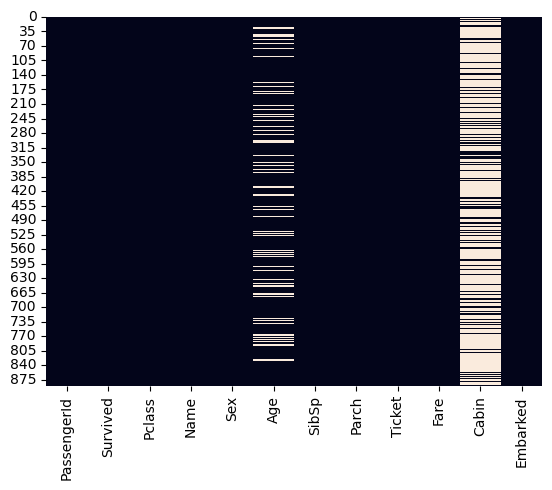

In [17]:
# 결측치 시각화
sns.heatmap(df.isnull(), cbar=False)  # 시본 시각화 확인

<AxesSubplot:>

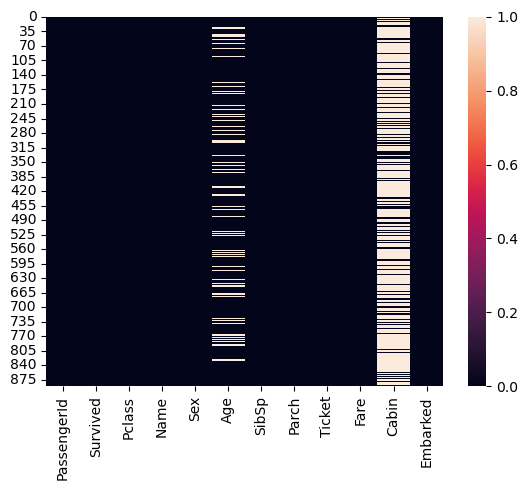

In [18]:
sns.heatmap(df.isnull(), cbar=True)  # 시본 시각화 확인

<AxesSubplot:>

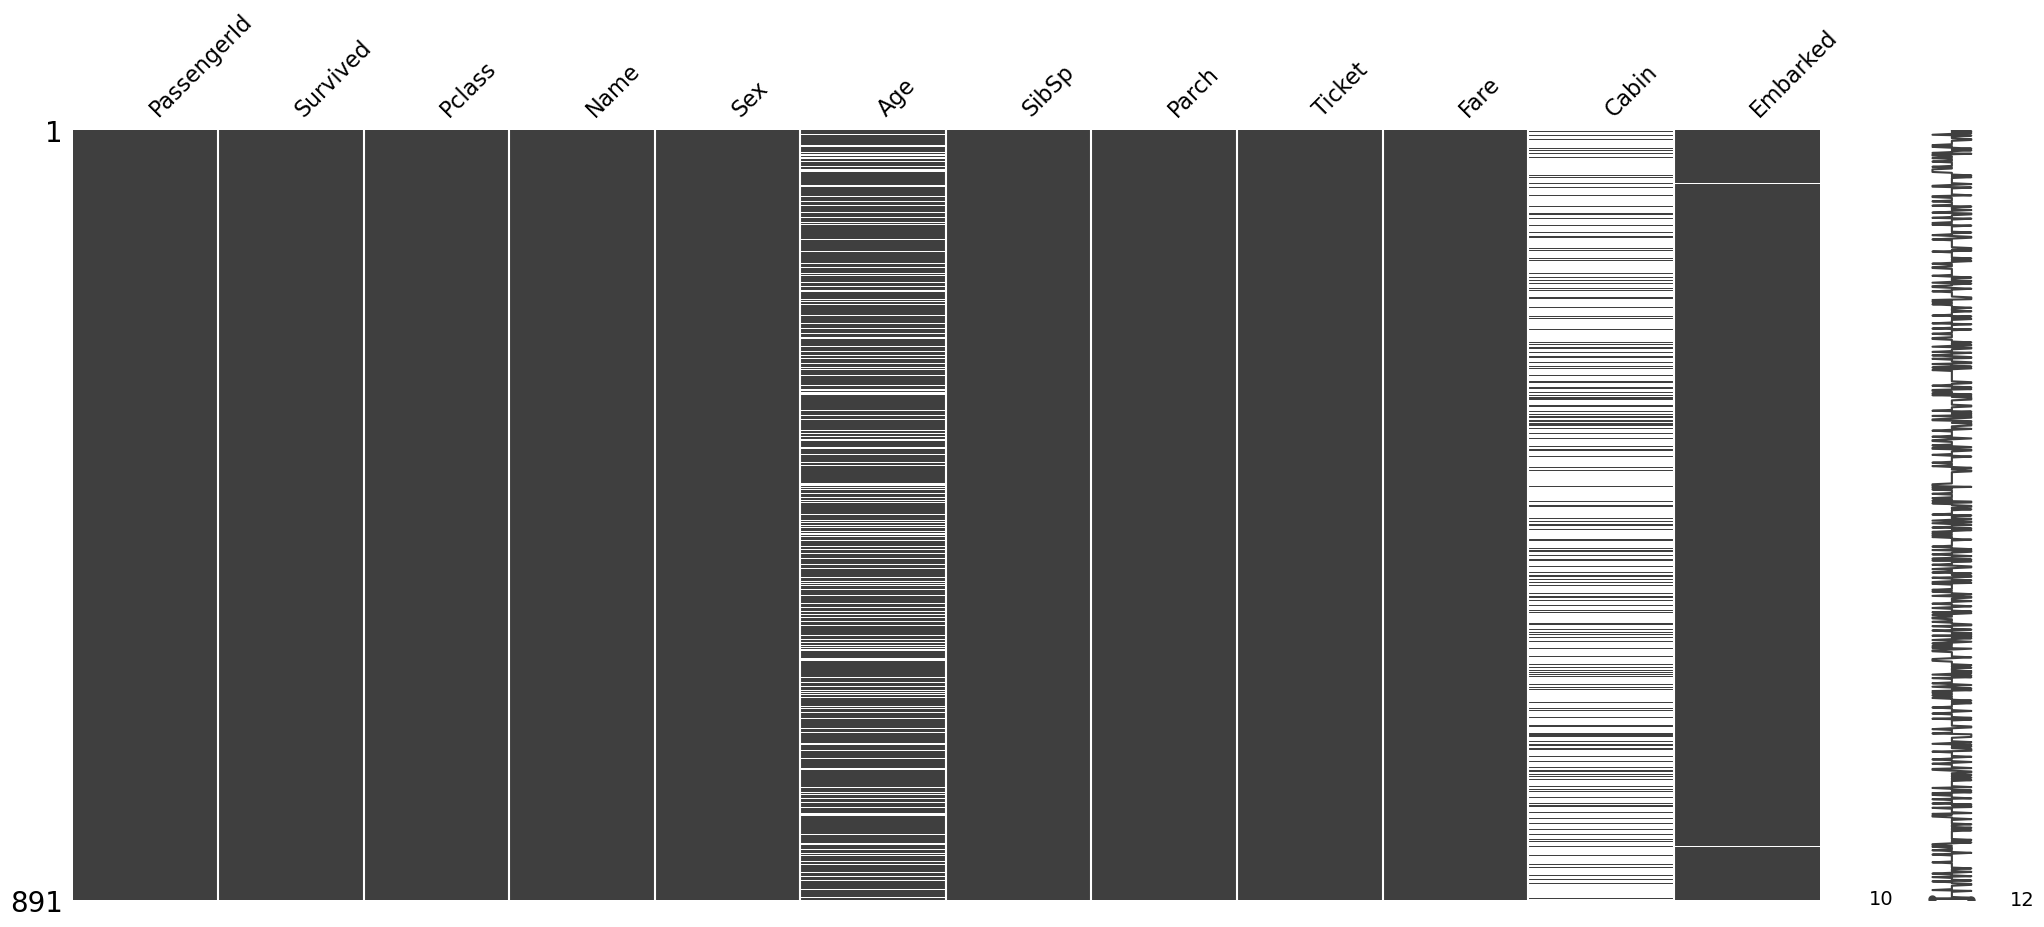

In [19]:
import missingno as msno  # missingno 패키지 임포트
msno.matrix(df)  # 매트릭스 결측치 시각화

<AxesSubplot:>

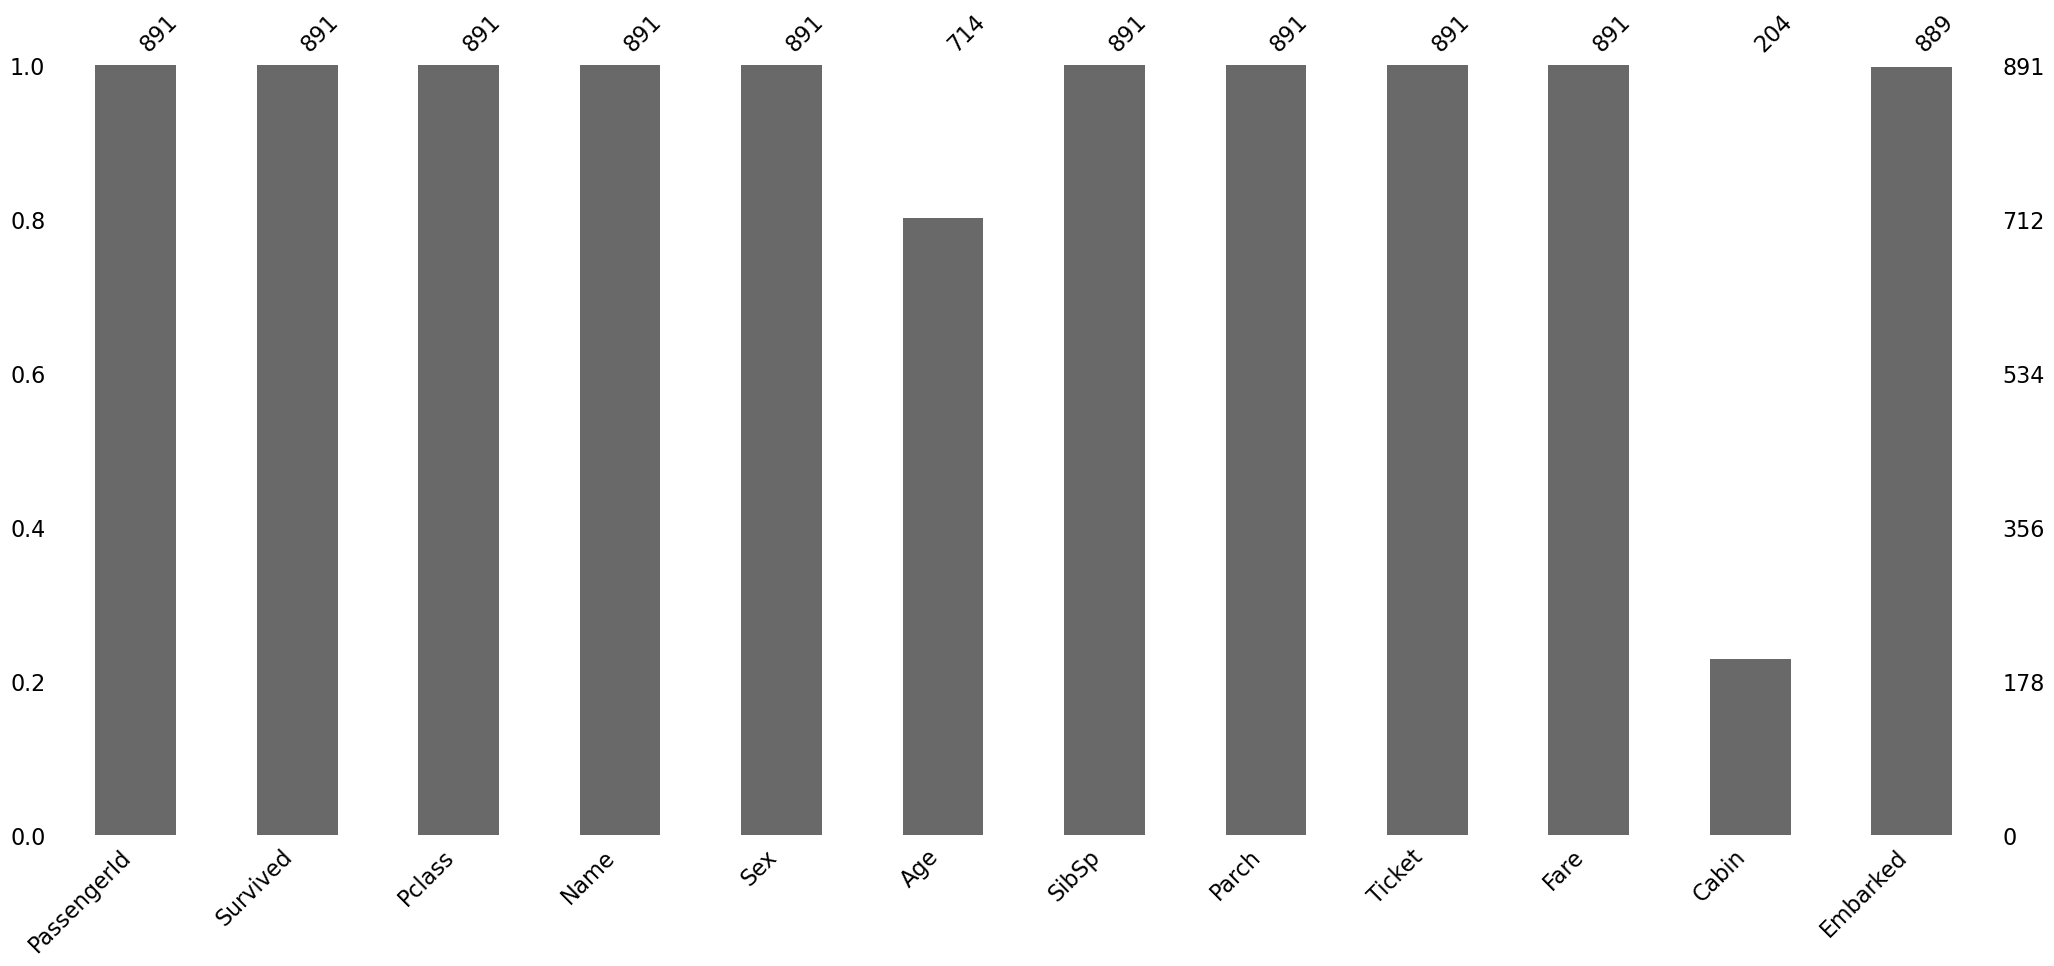

In [20]:
msno.bar(df)  # 바차트 결측치 시각화

<AxesSubplot:>

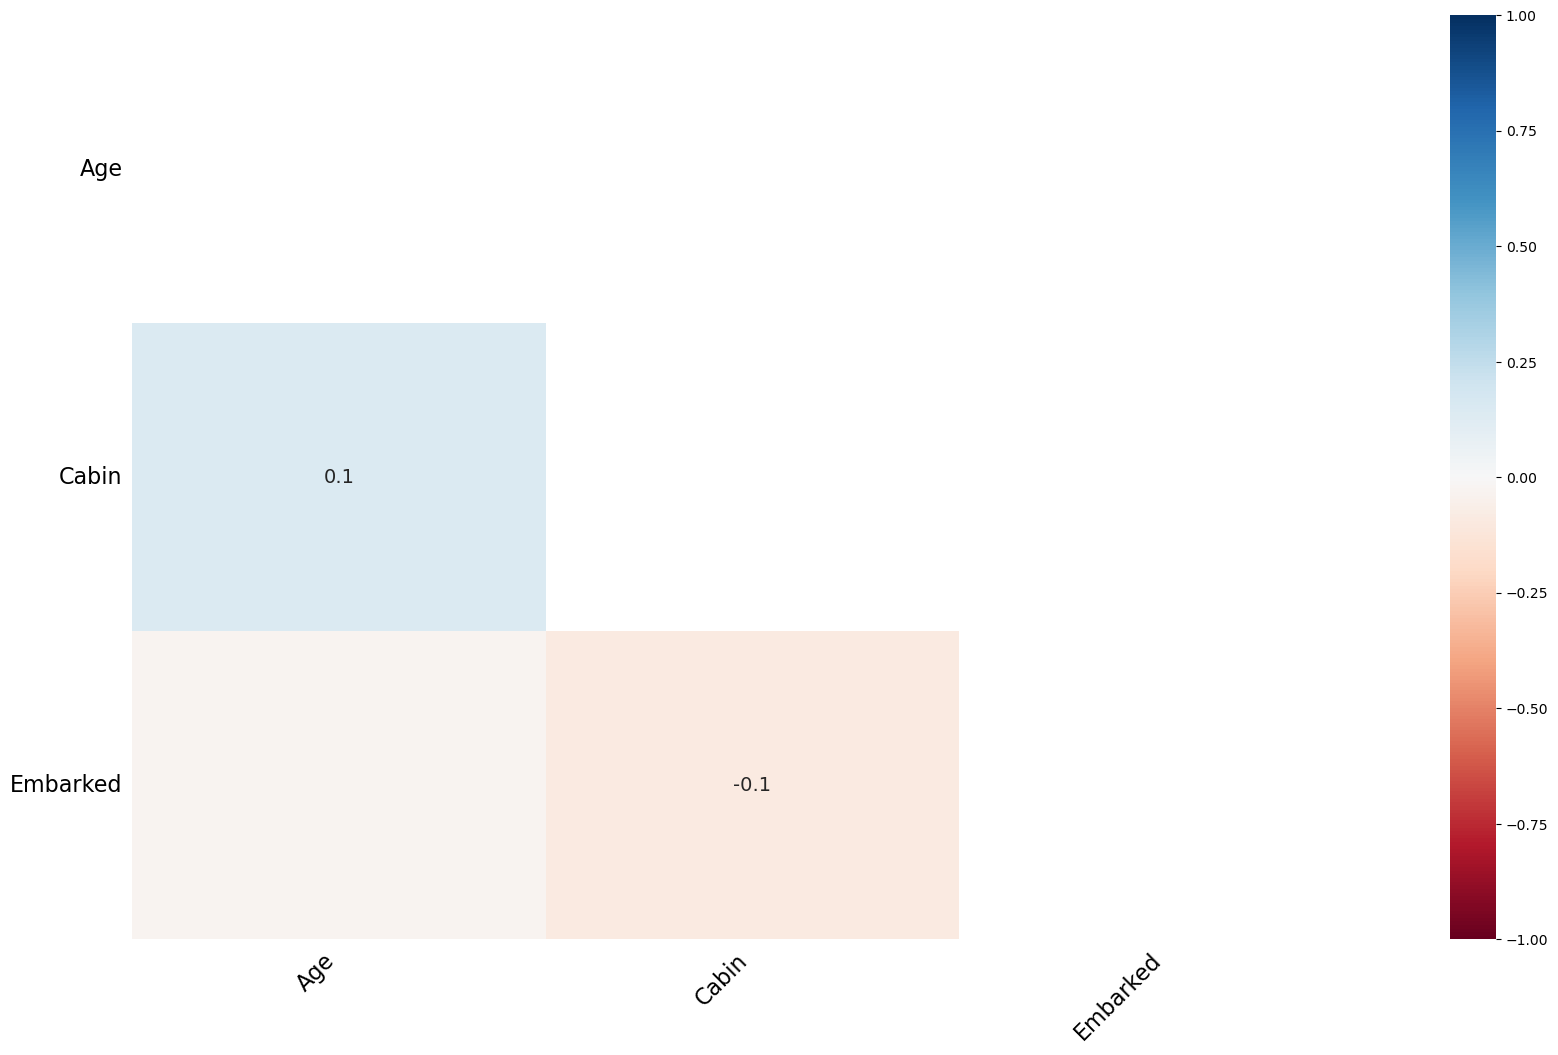

In [21]:
msno.heatmap(df)  # 히트맵 결측치 시각화

<AxesSubplot:>

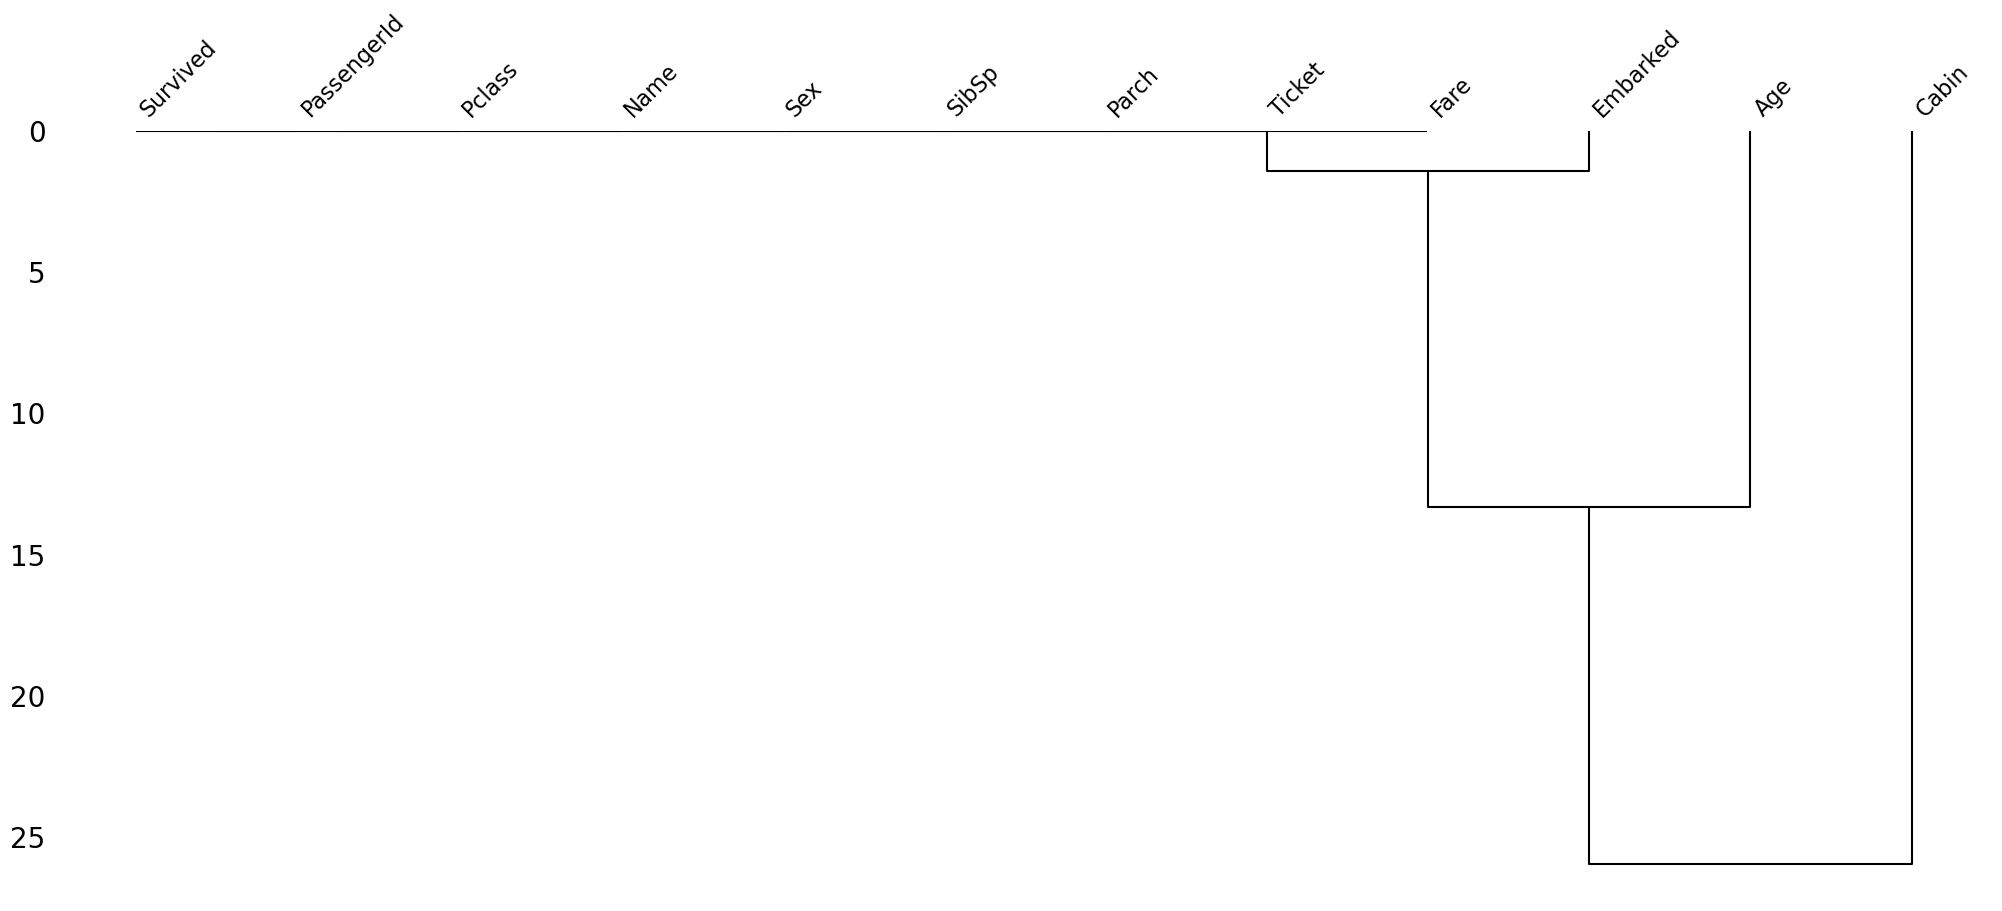

In [22]:
msno.dendrogram(df)  # 덴드로그램 결측치 시각화

In [23]:
# Cabin 결측 제거
df['Cabin'].value_counts()  #Cabin 삭제전 결측치 내용 확ㅇ니

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:>

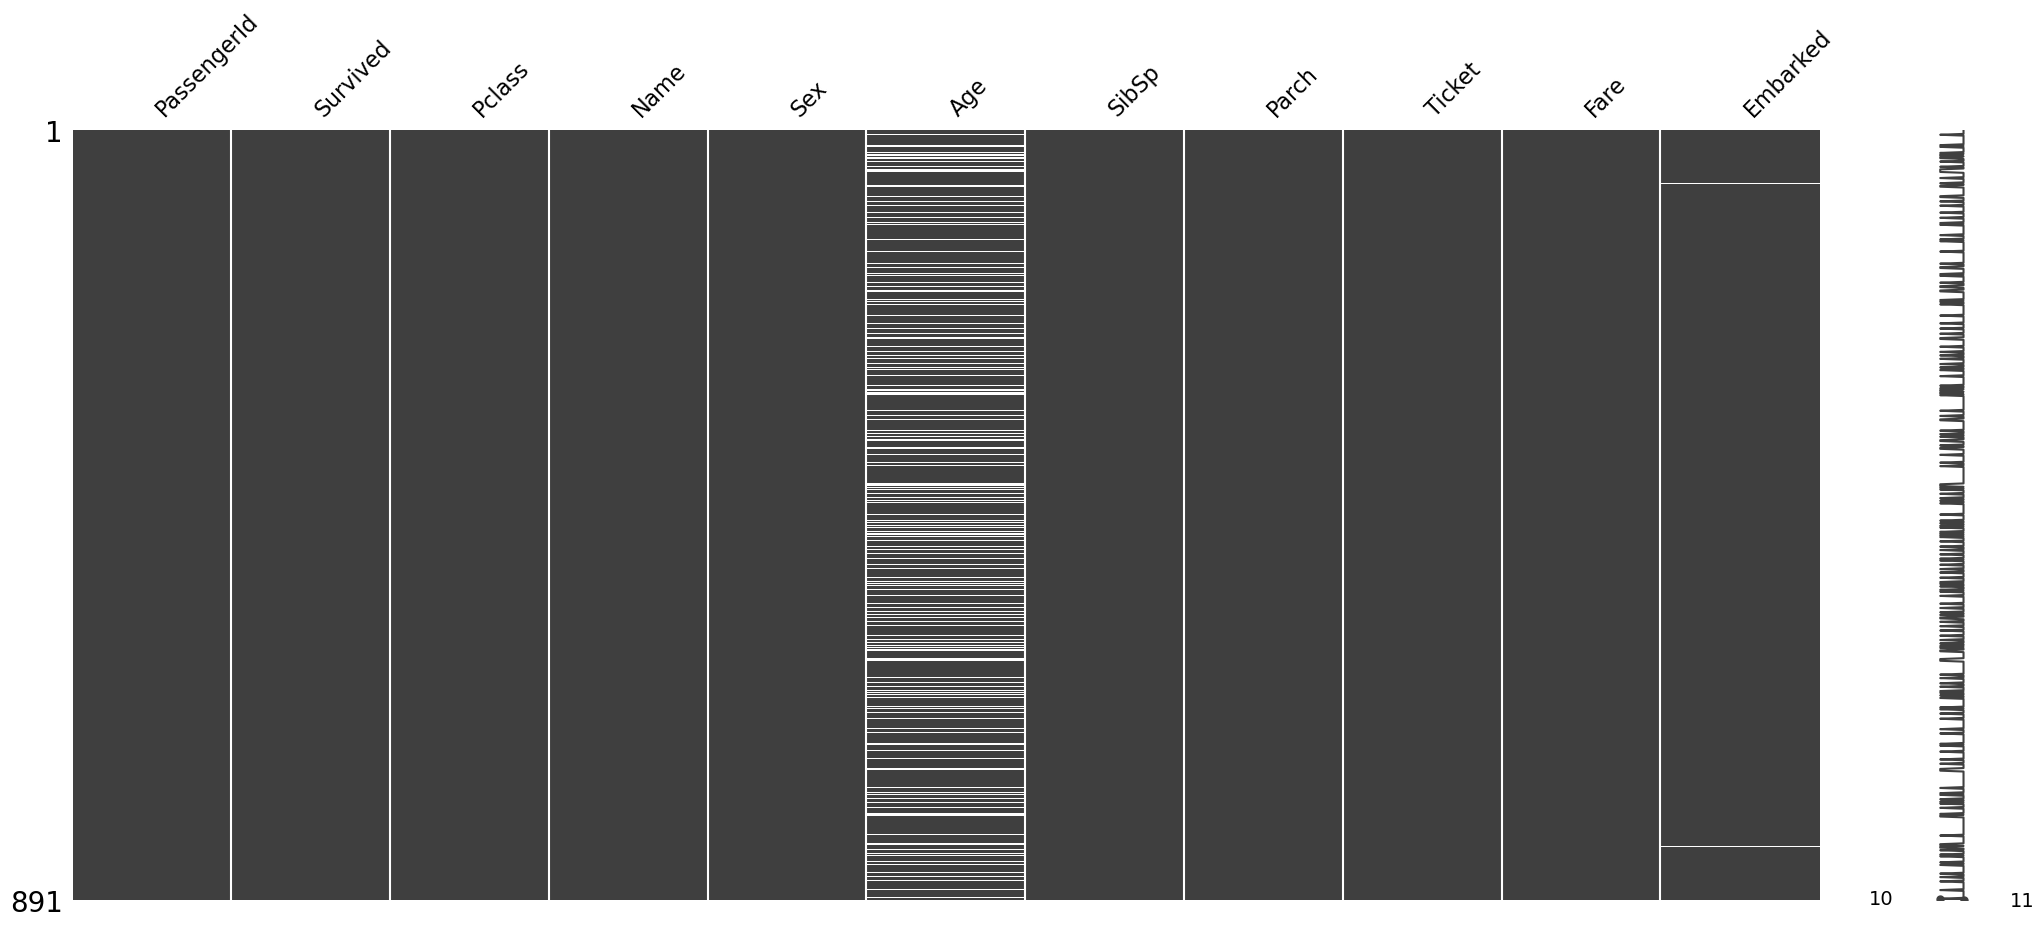

In [24]:
df = df.dropna(thresh = int(len(df) * 0.5), axis = 1)  #결측치 제거
msno.matrix(df)

In [25]:
# Embarked 대체
df['Embarked'].value_counts()  # 범주형 개수 확인

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df['Embarked'] = df['Embarked'].fillna('S')  #최다빈도 'S'로 대체

C:\Users\BurgerC\AppData\Local\Temp\ipykernel_21028\392064979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].fillna('S')  #최다빈도 'S'로 대체


C:\Users\BurgerC\AppData\Local\Temp\ipykernel_21028\3206069844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].mean())  # 나이 평균값으로 대체


<AxesSubplot:>

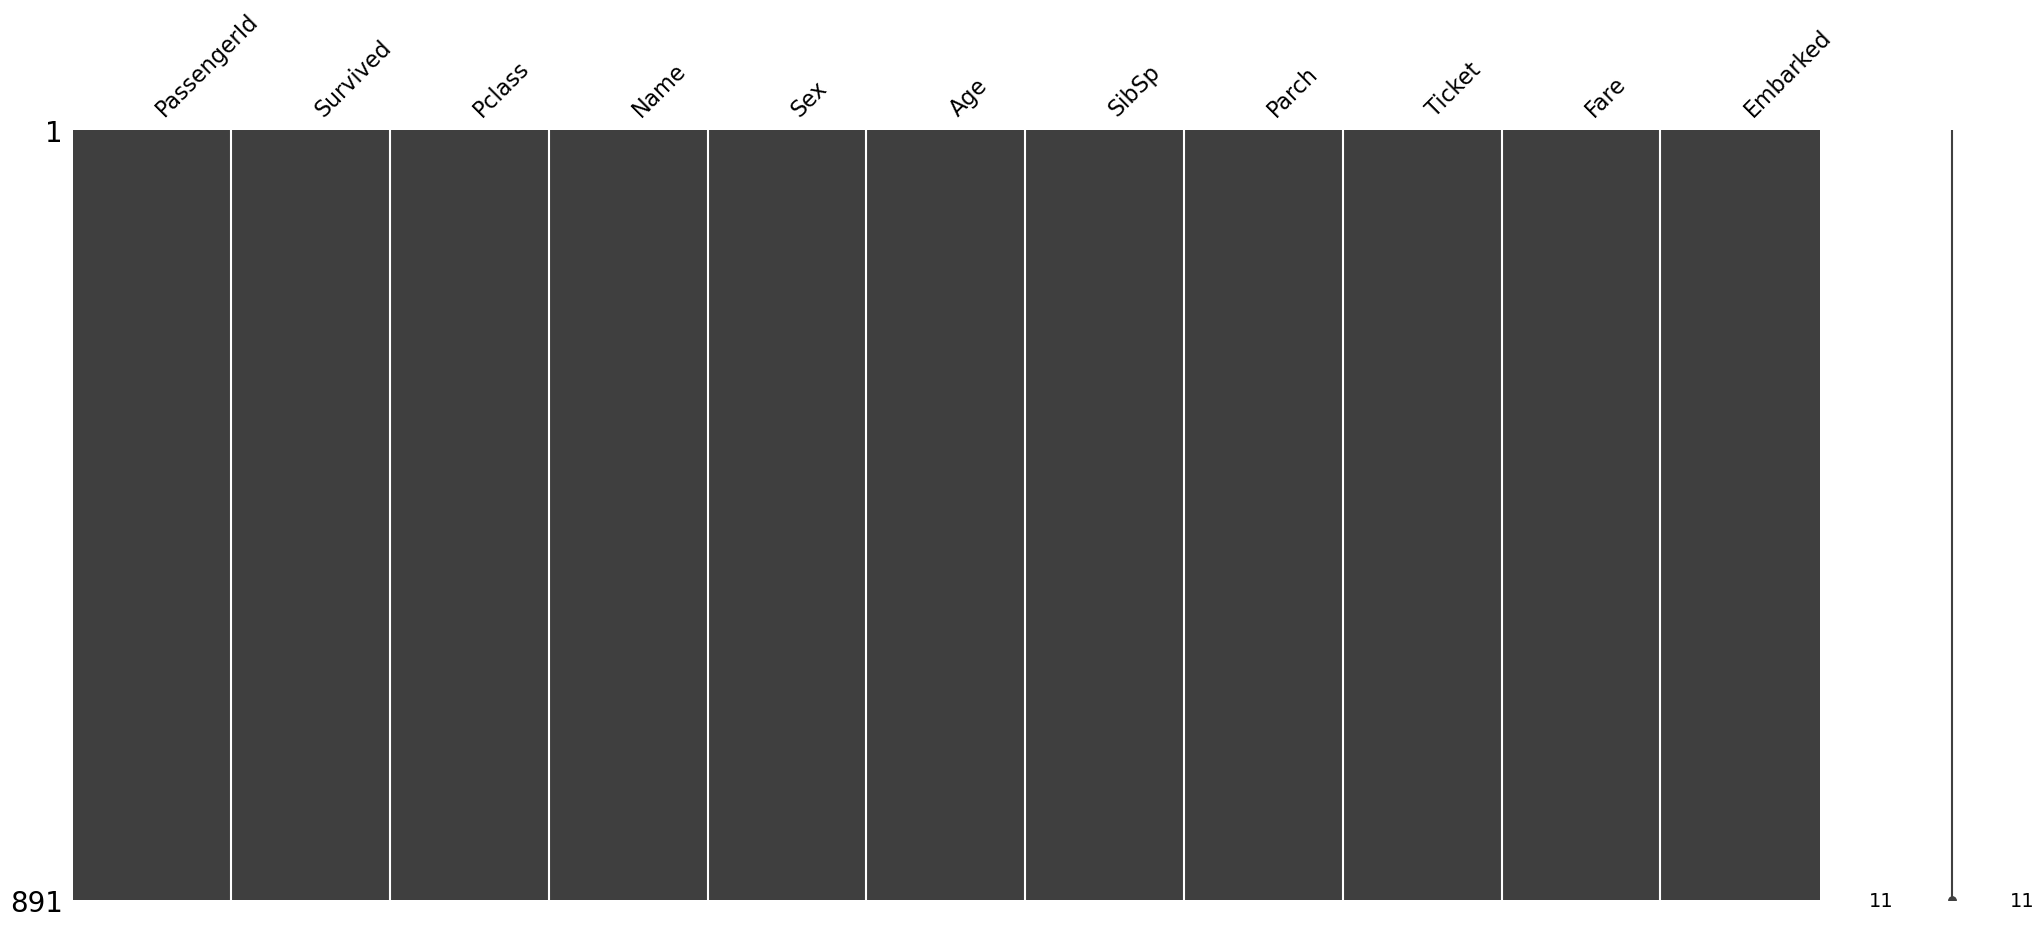

In [27]:
# 나이 대체
df['Age'] = df['Age'].fillna(df['Age'].mean())  # 나이 평균값으로 대체
msno.matrix(df)  #결측치 제거 최종 확인

## 데이터 탐색

In [28]:
# 데이터 바이닝 - 연속형 나이 변수 범주화 cut() 함수 사용
bins = [1, 20, 60, 100]  # 1-20 : 미성년, 21-60 : 성년, 61-100 : 성년
df_Age = pd.cut(df["Age"], bins, labels = ["미성년", "성년", "노년"])
df["Age_class"] = df_Age
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,성년
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,성년
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,성년
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,성년
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,성년
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,성년
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,미성년
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,성년
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,성년


In [29]:
t1 = df.Age_class.unique()  # 범주형 중복없이 value 추출
t2 = df[df.Age_class.isin(['미성년'])]  # 원하는 데이터만
t3 = df[~df.Age_class.isin(['미성년'])]  # 원하는 데이터 제외 필터링
print(t1)
print("======================================================================================")
print(t2)
print("======================================================================================")
print(t3)

['성년', '미성년', '노년', NaN]
Categories (3, object): ['미성년' < '성년' < '노년']
     PassengerId  Survived  Pclass                                  Name  \
7              8         0       3        Palsson, Master. Gosta Leonard   
9             10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3       Sandstrom, Miss. Marguerite Rut   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
..           ...       ...     ...                                   ...   
869          870         1       3       Johnson, Master. Harold Theodor   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   
876          877         0       3         Gustafsson, Mr. Alfred Ossian   
877          878         0       3                  Petroff, Mr. Nedelio   
887          888         1       1          Graham, Miss. Margaret Edith   

        Sex   Ag

In [30]:
# 전체를 3개 범주로 구분
df_Age2 = pd.qcut(df["Age"], q = 3, labels=["미성년", "성년", "노년"])
df["Age_class2"] = df_Age2
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class,Age_class2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,성년,미성년
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,성년,노년
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,성년,성년
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,성년,노년
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,성년,노년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,성년,성년
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,미성년,미성년
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,성년,성년
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,성년,성년


In [31]:
# 범주형 컬럼 처리
# 원핫인코딩
df['Sex']=df['Sex'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df2=pd.get_dummies(df)
df2

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Age_class_미성년,Age_class_성년,Age_class_노년,Age_class2_미성년,Age_class2_성년,Age_class2_노년
0,1,0,22.000000,1,0,7.2500,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,2,1,38.000000,1,0,71.2833,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,3,1,26.000000,0,0,7.9250,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,4,1,35.000000,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,5,0,35.000000,0,0,8.0500,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
887,888,1,19.000000,0,0,30.0000,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
888,889,0,29.699118,1,2,23.4500,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
889,890,1,26.000000,0,0,30.0000,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [32]:
# 성별, 선실, 나이 그룹에 의한 생존율을 데이터프레임으로 계산합니다.
# 행에는 성별 및 나이 그룹에 대한 다중 인덱스를 사용하고 열에는 선실 인덱스를 사용합니다.
df1 = df.groupby(['Sex', 'Age_class', 'Pclass'])["Survived"].mean()
df2 = df1.unstack("Pclass")
df2

Pclass                   1         2         3
Sex    Age_class                              
female 미성년        0.928571  1.000000  0.465116
       성년         0.974359  0.900000  0.489583
       노년         1.000000       NaN  1.000000
male   미성년        0.500000  0.357143  0.180556
       성년         0.388350  0.069767  0.119850
       노년         0.083333  0.333333  0.000000

In [33]:
df.pivot_table(['Survived'], index=['Sex', 'Pclass'], aggfunc='mean')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

## 데이터 탐색 자동 보고서

- 데이터 탐색 과저엥서 데이터 내 값의 분포, 변수 간의 관계, Null 값과 같은 결측값(Missing values) 존재 유무 등을 파악하게 되는데 이와 같은 데이터를 파악하는 과정을 EDA(Exploratory Data Analysis, 탐색적 데이터 분석)이라고 함.
<br><br>
- 판다스에서 모든 EDA 과정을 한 번에 시각화하는 '데이터 탐색 자동 리포팅' 기능을 제공
<br><br>
- 리포트 파일은 주피터 노트북 기본 폴더에 HTML 파일로 생성

- pip install pandas-profilling # 라이브러리 설치

In [34]:
import pandas_profiling
report = df.profile_report()
report.to_file('report.html')

C:\Users\BurgerC\AppData\Local\Temp\ipykernel_21028\4229423015.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\BurgerC\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.savefig(
C:\Users\BurgerC\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.savefig(
C:\Users\BurgerC\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.savefig(
C:\Users\BurgerC\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  plt.savefig(
C:\Users\BurgerC\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.savefig(
C:\Users\BurgerC\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:7

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 개요
- 개요(Overview)는 데이터 전체적인 요약을 출력합니다.
<br><br>
- 데이터의 크기, 변수의 수, 결측값(missing value) 비율, 데이터의 종류는 어떤 것이 있는지를 확인할 수 있습니다.

### 변수
- 변수(Variables)는 데이터에 존재하는 모든 특성 변수들에 대한 결측값, 중복을 제외한 유일한 값(unique values)의 개수 등의 결과를 나타냅니다.
<br><br>
- 또한 상위 5개의 값에 대해 우측에 바 그래프로 시각화한 결과도 제공합니다.

### 기타사항
- 이외에도 판다스 프로파일링은 수치형 데이터를 위한 상관계수(correlations), 결측값에 대한 히트맵(heatmap) 등의 기능도 제공합니다.

## 데이터 시각화 분석

### 단일 범주형/연속형 분석
- 범주형
>- 생존여부는 어떨까?
>- 남녀의 성비는 어떨까?
>- 좌석 등급별 성비는 어떨까?
>- 출발 항구별 비율은 어떨까?
<br><br>
- 연속형
>- 나이분포
>- 요금분포

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


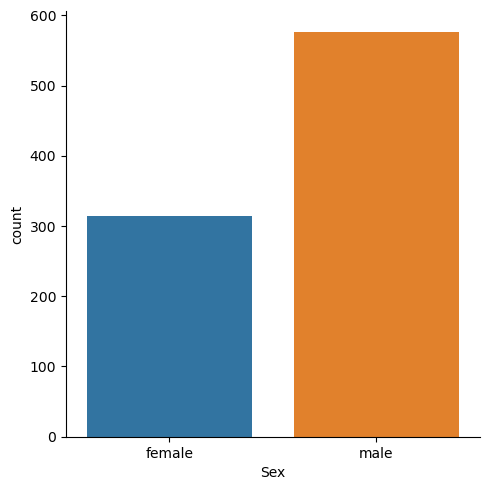

In [35]:
# 범주형 확인
# 남녀 성비 확인
sns.catplot('Sex', kind='count', data=df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


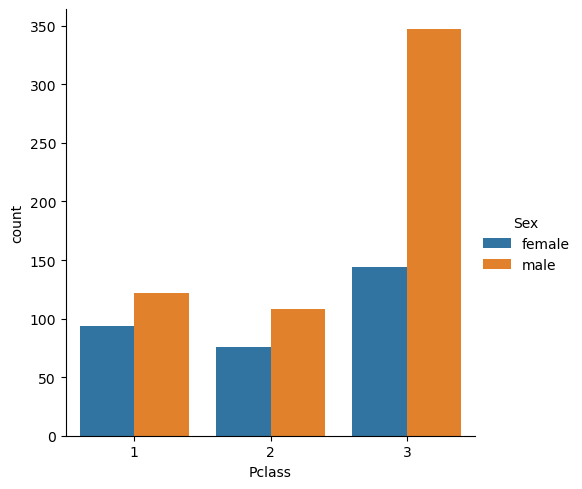

In [36]:
# 좌석 등급별 성비 확인
sns.catplot('Pclass', kind='count', hue='Sex', data=df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


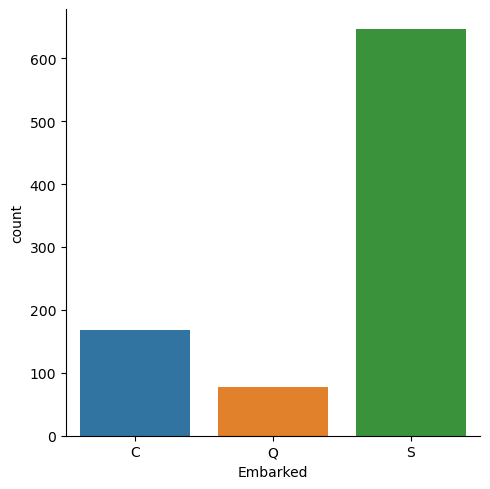

In [37]:
# 출발항구별 분포 확인
sns.catplot('Embarked', kind='count', data =df)

<AxesSubplot:>

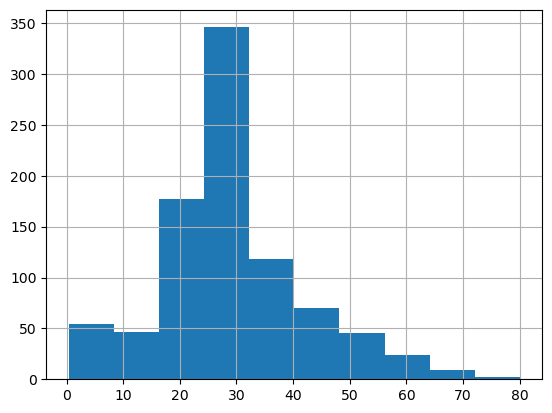

In [38]:
# 연속형 # 나이 분포
df['Age'].hist()

<AxesSubplot:>

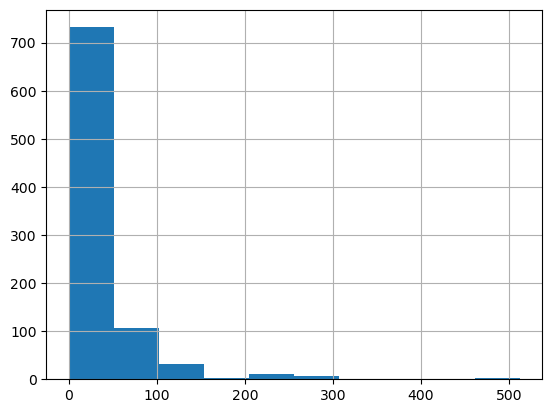

In [39]:
# 연속형 # 요금 분포
df['Fare'].hist()

### 범주형X범주형
- 생존자 중심으로 교차 분석
>- 성별/생존자?
>- 객실등급별/생존자?
>- 탑승항구별/생존자?

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


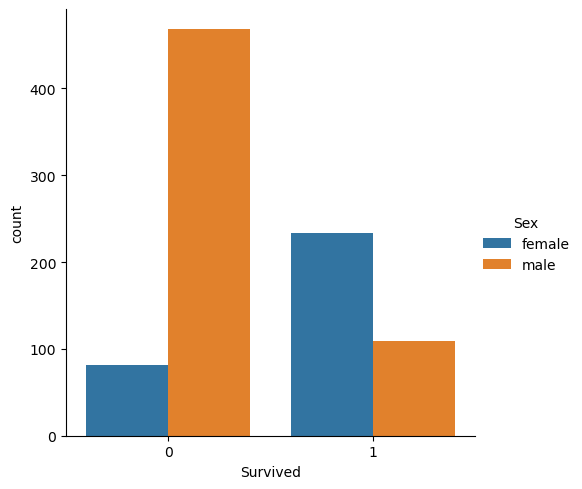

In [40]:
# 생존자 분석
sns.catplot('Survived', kind='count', hue='Sex', data=df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


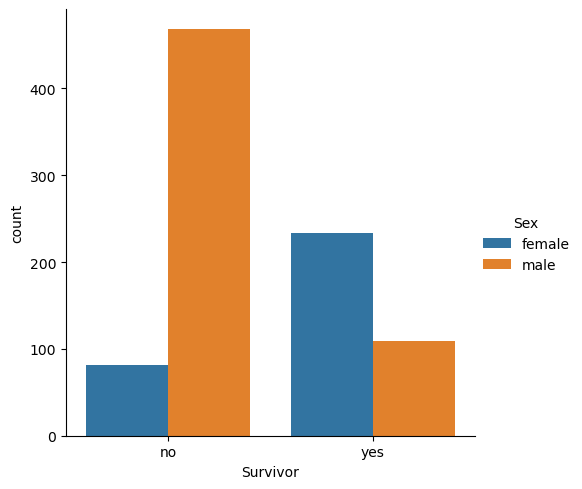

In [41]:
# 보기 편하게 생존자 구분 변환
df['Survivor'] = df['Survived'].map({0:'no', 1:'yes'})

# 생존/성별
sns.catplot('Survivor', kind='count', hue='Sex', data = df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


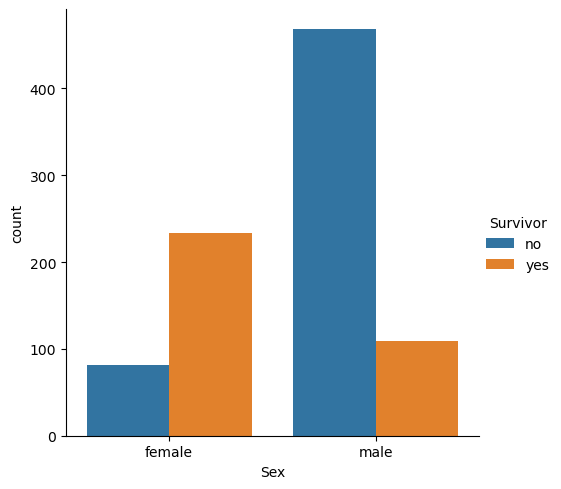

In [42]:
# 성별/생존자
sns.catplot('Sex', kind='count', hue='Survivor', data=df)
# 남자일수록 사망자가 많습니다.

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


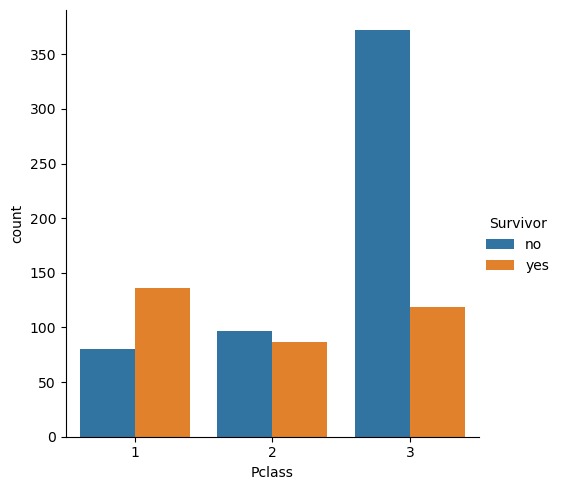

In [43]:
# 좌석등급별 생존자 확인
sns.catplot('Pclass', kind='count', hue='Survivor', data=df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


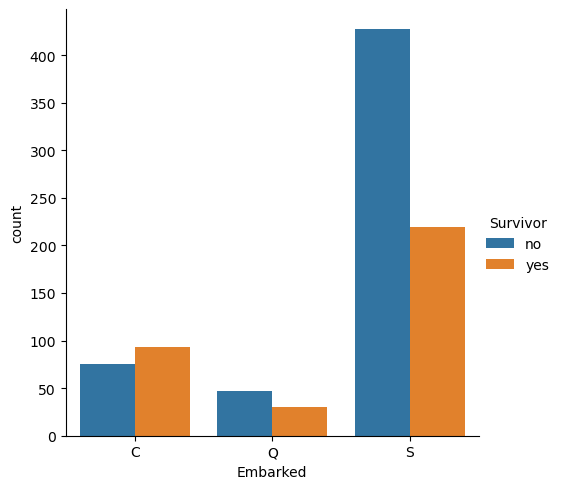

In [44]:
# 항구별/생존
sns.catplot('Embarked', kind='count', hue='Survivor', data=df)
## 생존율이 다릅니다.

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


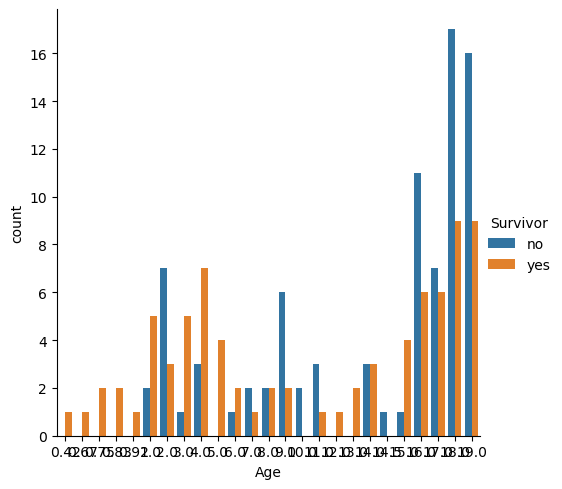

In [45]:
# 연령대별/사망자 20세 미만의 아이들을 확인
sns.catplot('Age', kind='count', hue='Survivor', data=df.loc[df['Age']<20])

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


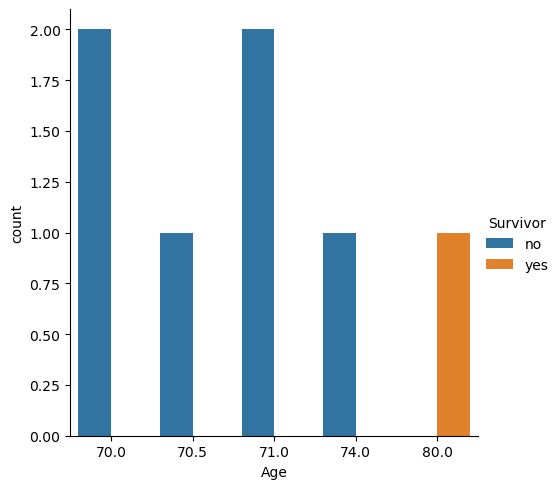

In [46]:
# 연령대별/사망자 70세 이상 노인
sns.catplot('Age', kind='count', hue='Survivor', data=df.loc[df['Age']>=70])

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


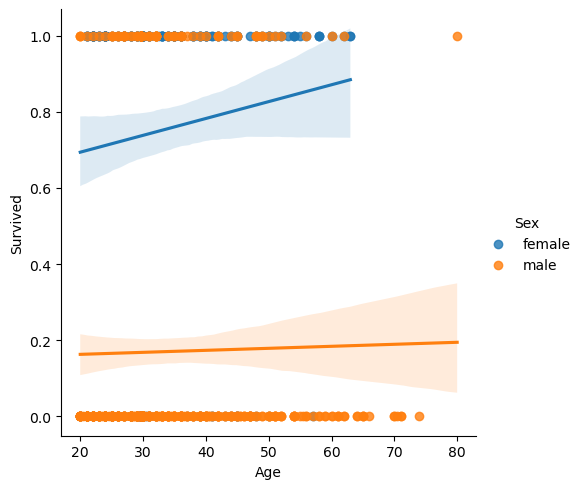

In [47]:
# 20세 이상, 어른의 경우 연령에 따른 사망률과의 관계는 적으며, 남자일 경우 사망률이 높습니다.
sns.lmplot('Age', 'Survived', hue='Sex', data=df.loc[df['Age']>=20])

C:\Users\BurgerC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BurgerC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BurgerC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BurgerC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


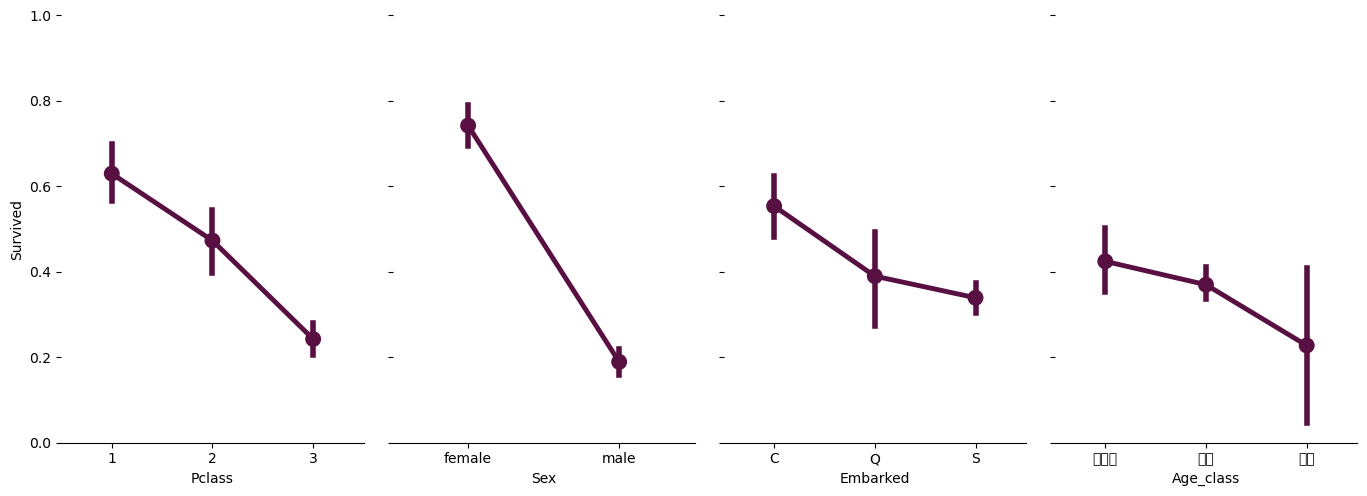

In [48]:
# Pairgrid 플롯활용 범주 전체를 시각화 할 수 있습니다.
# 생존률/성별, 객실등급별, 탑승항구별, 연령대그룹별
Pg = sns.PairGrid(df, y_vars="Survived",
                 x_vars=["Pclass", "Sex", "Embarked", "Age_class"],
                 height=5, aspect=.7)
Pg.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")

Pg.set(ylim=(0, 1))
sns.despine(fig=Pg.fig, left=True)

# 한글처리
plt.rc('font', family='Malgun Gothic')

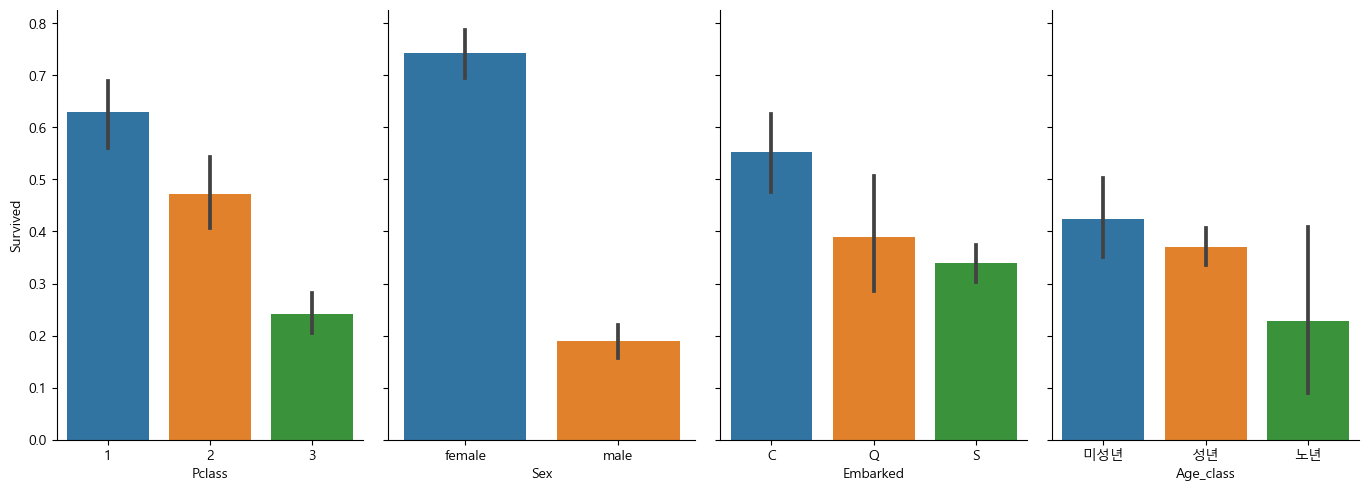

In [49]:
# Pairgrid bar 서브플롯 적용
Pg = sns.PairGrid(df, y_vars="Survived",
                 x_vars=["Pclass", "Sex", "Embarked", "Age_class"],
                 height=5, aspect=.7)
Pg.map(sns.barplot)

In [50]:
# Pairgrid violin 서브플롯 적용
Pg.map(sns.violinplot)

### 범주형X연속형
>- 성별/나이?
>- 객실등급별/나이?
>- 탑승항구별/나이?
>- 가족그룹(파생변수)

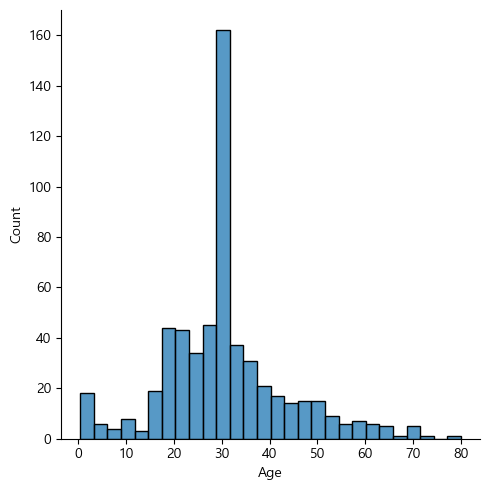

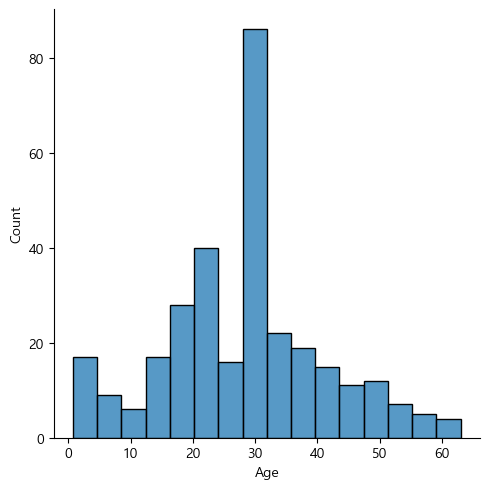

In [51]:
# 성별/나이
sns.displot(df['Age'].loc[df['Sex']=='male'])
sns.displot(df['Age'].loc[df['Sex']=='female'])

# 연령에 따른 사망과 상관성이 성별에 따라 다릅니다.
# 남성일 경우 나이가 많을 수록 사망자 수가 높지만, 여성의 경우 나이가 많을수록 사망자가 낮게 나타납니다.

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class,Age_class2,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,성년,미성년,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,성년,노년,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,성년,성년,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,성년,노년,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,성년,노년,no


C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


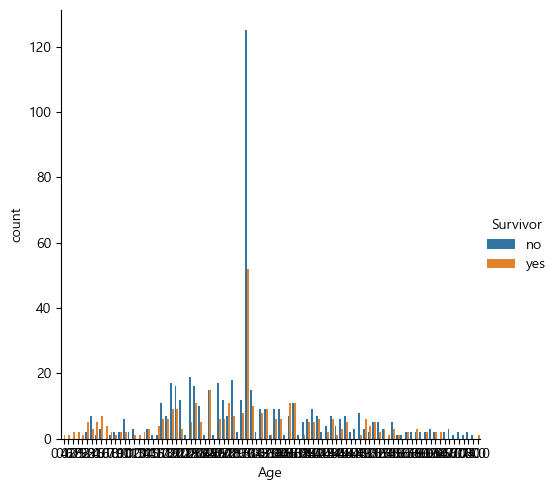

In [53]:
# 생존자/나이
sns.catplot('Age', kind='count', hue='Survivor', data=df)

# 여성의 경우 형제/자매가 많을 수록 사망률이 증가하며, 남서으이 경우 차이가 없는 경향이 있습니다.

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


C:\Users\BurgerC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


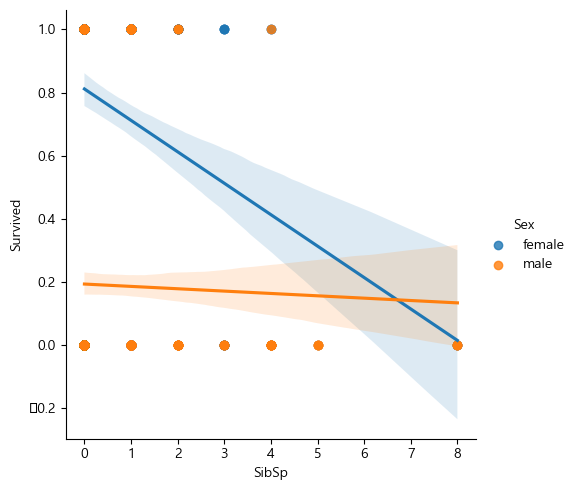

In [54]:
sns.lmplot('SibSp', 'Survived', hue='Sex', data=df)

# 부모나 자식이 많은 가족의 경우 남자일 경우 사망자가 낮으며, 여성의 경우 사망자가 많은 경향이 있습니다.

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


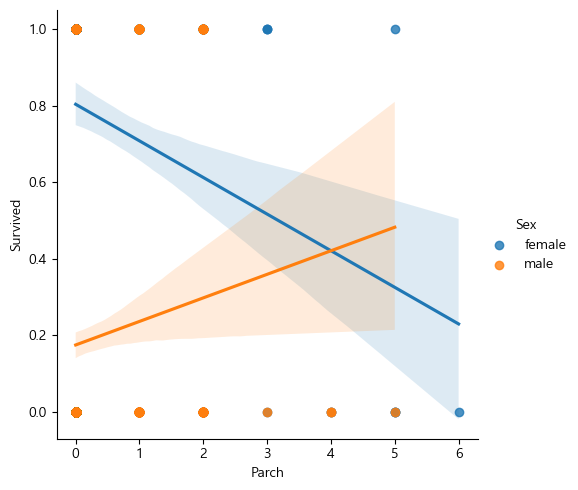

In [55]:
sns.lmplot('Parch', 'Survived', hue='Sex', data=df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


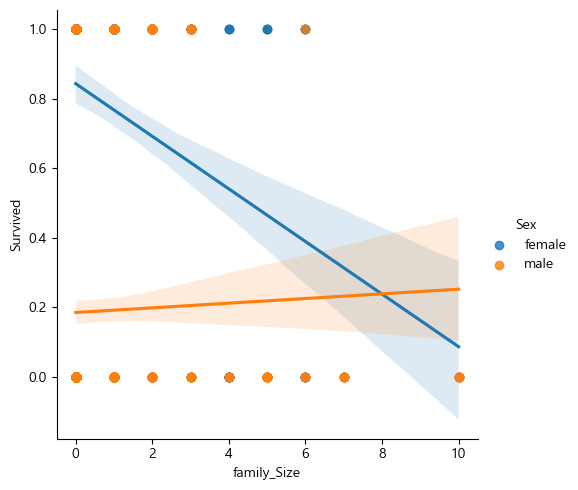

In [57]:
# 파생변수 만들기
# 형제/자매와 부모/자식의 수를 더하여, 가족의 크기라는 특성을 만들어 봅니다.
# 여성의 경우 가족수가 많을 수록 사망자가 감소하는 경향이 있습니다.
# 남성의 경우 상관관계가 적습니다.

df['family_Size'] = df['SibSp'] + df['Parch']
sns.lmplot('family_Size', 'Survived', hue='Sex', data=df)

C:\Users\BurgerC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


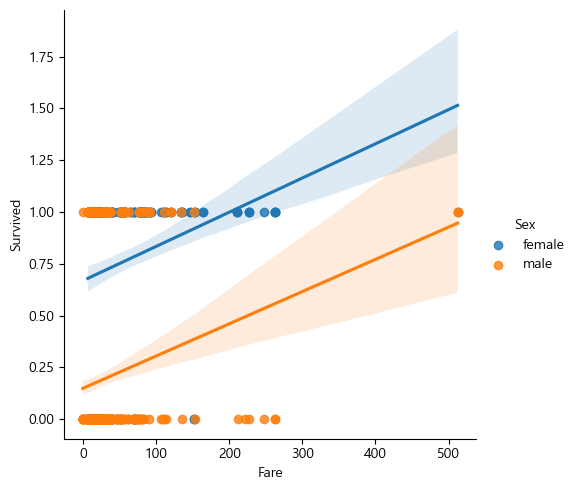

In [58]:
# 남녀 상관없이 요금의 경우 높을 수록 생존율이 높습니다.
sns.lmplot('Fare', 'Survived', hue='Sex', data=df)

### 함수생성과 파라미터 변경


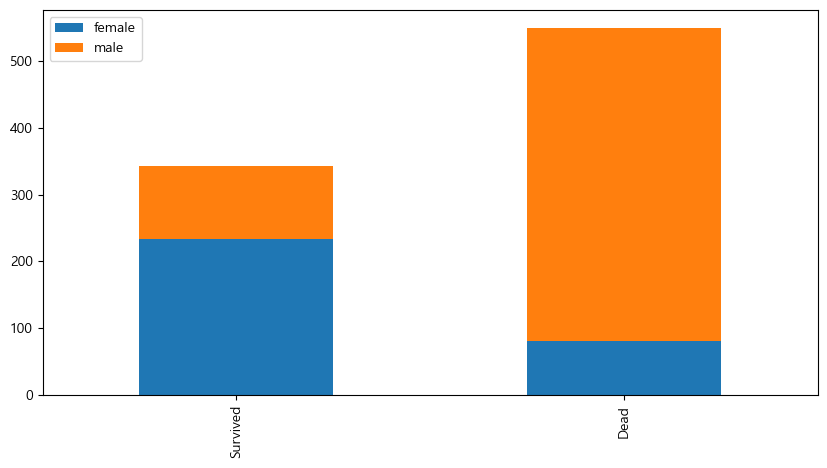

In [60]:
# 생존에 따른 bar차트 함수
def bar_chart(feature):
    Survived = df[df['Survived']==1][feature].value_counts()
    Dead = df[df['Survived']==0][feature].value_counts()
    df_titanic = pd.DataFrame([Survived, Dead])
    df_titanic.index = ['Survived', 'Dead']
    df_titanic.plot(kind='bar', stacked=True, figsize=(10, 5))
    
    
# 생존/성별
# 여성이 남성보다 생존할 가능성이 더 높습니다.
bar_chart('Sex')

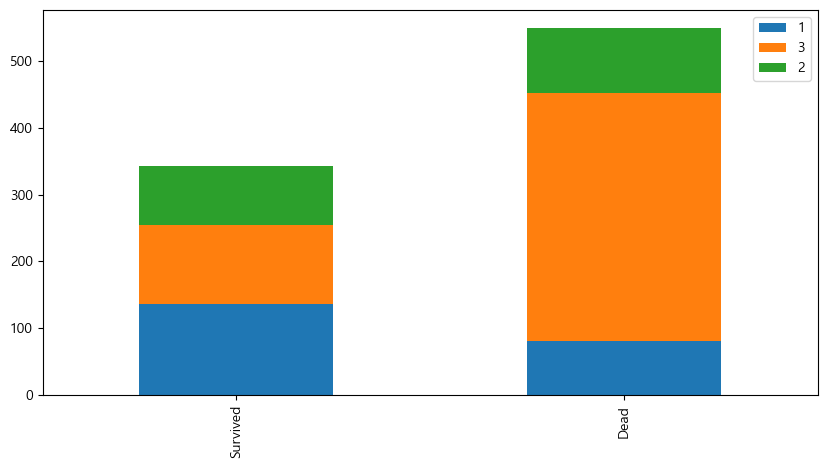

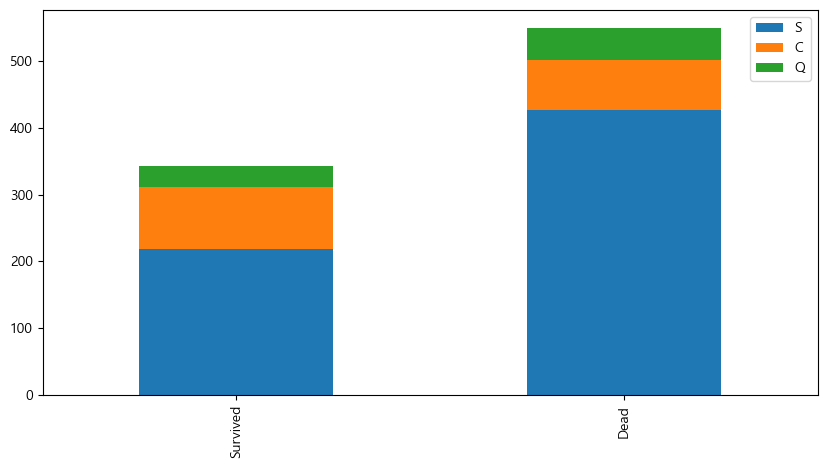

In [61]:
# 생존/등급별
# 차트는 1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높습니다.
# 차트는 3등급 클래스가 다른 클래스보다 죽을 가능성이 더 높습니다.
bar_chart('Pclass')

# 생존/항구별
bar_chart('Embarked')

## 타이타닉 분석 요약
1. 항구에 따라 사망자 수의 차이가 있으며, 연령값은 결측치가 많기 때문에 적절한 값으로 전처리 해야 합니다.<br><br>
1. 남성일 경우 사망자가 많으며 여성일 경우 적은 경향이 있습니다.<br><br>
1. 사회적 계층(객실, 요금 등)이 높을 수록 사망자가 줄어듭니다.<br><br>
1. 연령이 낮은 16세 이하일 경우 사망자가 적으며, 성인의 경우 큰 차이는 없습니다.<br><br>
1. 변수는 바이닝 분석합니다.<br><br>
1. 파생변수를 만들어 분석 할 수 있습니다.